# An analysis on select root finding algorithms and their convergence rates. 

In [1]:
##Necessary Imports 
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.optimize as sciop
import warnings

In [ ]:
#Run this cell if you wish to inspect the graphs and approximations made by each method interactively

%matplotlib notebook

## 1.1 The Bisection Method

Consider a function $f(x)$ that is known to have a root in the closed interval $[a,b]$. This implies the following:

$$ f(a)f(b) < 0 $$

In effect, *either* $f(a) < 0$ or $f(b) < 0$ but not both. If the above test is validated for $a$ and $b$ this indicates a root must lie in the interval $[a,b]$. 

Taking the midpoint on the interval $[a,b]$ yields a value $p$ where $p = \frac{a+b}{2}$. The test is then performed again using the value $p$ as the start or the end of the interval. Depending on the result of the test using the value $p$ *either* $[a,p]$ becomes the new interval or $[p,b]$. This process is continued until a desired approximation of the root value is obtained, the interval operated on receeds until a set tolerance. 

Below is the outline for a Bisection function that would approximate the roots of continuos functions analytically. This function was then applied to three test functions for which the roots may not be easily solved for and the total iteration count was noted:

1) $e^{-x} = \cos(x) $

2) $x^{3} - 6x + 3 = 0 $

3) $\ln(x-0.5) = -2x^{2} $

In [2]:
#Defines functions for equations (a)-(c)
def functionA(x):
    return np.cos(x) - np.exp(-x)

def functionB(x):
    return x**3 - 6*x + 3

def functionC(x):
    return -2*x**2-np.log(x-0.5)

*The above test functions were used throughout sections 1.1 to 1.3*

In [3]:
#Defines a Bisection function
def bisect(func, a0, b0, ep, max_iterate, decimals=None, verbose=False, *arg):
    """Root finding function using bisection method. 
    
    Args:
        func:     Function whose roots need to be found
        a0:       Lower bound of search interval 
        b0:       Higher bound of search interval
        ep:       Error tolerance for the found root 
        max_iterate: Maximum number of iterations allowed to find root
        
    Optional Args:
        verbose:  Boolean to determine whether to print the iterations
        *arg:     Any additional arguments that should be passed through to the function 'func'
         
    Returns:
        root:     Root of the function found by bisect
        error_bound: Error bound for the found root
        it_count: Number of iterations taken to find root 
    """
    # Error handling: Ensures input interval is the correct way around
    if a0 >= b0:
        raise Exception("a0 < b0 is not true. Stop!") 
        
    a = a0
    b = b0 
    fa = func(a, *arg)
    fb = func(b, *arg)   
    
    # Error Handling: It is a requirement that f(a) and f(b) have different signs therefore a root must exist.
    if np.sign(fa)*np.sign(fb) > 0: 
        raise Exception("f(a0) and f(b0) are of the same sign. Stop!")
        
    c = (a+b)/2
    
    it_count = 0
    
    # Loop until we are confident we have achieved at least the accuracy specified by ep.
    # The ep/2 is genuinely needed to ensure our result (rounded to nearest 'ep') matches
    # the true solution (when also rounded to nearest 'ep').
    while b-c > ep/2 and it_count <= max_iterate:
        it_count += 1 
        fc = func(c, *arg)
        if verbose == True:
            print('#{0}, interval [{1} - {2} - {3}], f(c)={4}, width {5}'.format(it_count, a, c, b, fc, b-c))
        if np.sign(fb)*np.sign(fc) < 0:
            a = c
            fa = fc
        else: 
            b = c
            fb = fc 
        c = (a+b)/2 
        
    if verbose == True:
        print('Stopped, interval [{1} - {2} - {3}], f(c)={4}, width {5}'.format(it_count, a, c, b, fc, b-c))

    if it_count > max_iterate:
        print("WARNING: The number of iterations exceeded max_iterate. An accurate root was not calculated")
    
    if decimals != None: 
        root = np.around(c, decimals) 
    else:
        root = c
    error_bound = b-c 
    
    return(root, error_bound, it_count)

In [23]:
#Defines a function to automatically plot the graph of a function given the set parameters. 
def plot_graph(function,startpt,endpt,interval_no):
    x = np.linspace(startpt,endpt,interval_no)
    
    plt.figure(figsize=(15,15))
    plt.plot(x,function(x),label="Graph of function")
    plt.axhline(0,linestyle="--",label="Line y = 0", color="green")
    plt.xlabel("X Values")
    plt.ylabel("f(x) values")
    plt.title("Graph of f(x)")
    plt.grid()
    plt.legend()
    plt.show()
    
    return x

In [24]:
#Defines a function to plot the Bisection approximation of the root calculated.
def Bisect_soln(function, a0, b0, ep, max_iter, x):
    
    root,error,iterations = bisect(function,a0,b0,ep,max_iter)
    
    plt.figure(figsize=(15,15))
    plt.plot(x,function(x), label="Graph of function")
    plt.axhline(0, linestyle="--", color="green", label="Line y = 0")
    plt.axvspan(root-error,root+error,alpha=0.5,color="red", label="Smallest Positive Root\nvia Bisection\n" + str(np.around(root,decimals=4)) + u"\u00B1" + str(np.around(error,decimals=8)) + "\nIterations Required: " + str(iterations))
    plt.xlabel("X Values")
    plt.ylabel("f(x) values")
    plt.title("Graph of f(x)")
    plt.grid()
    plt.legend()
    plt.show()

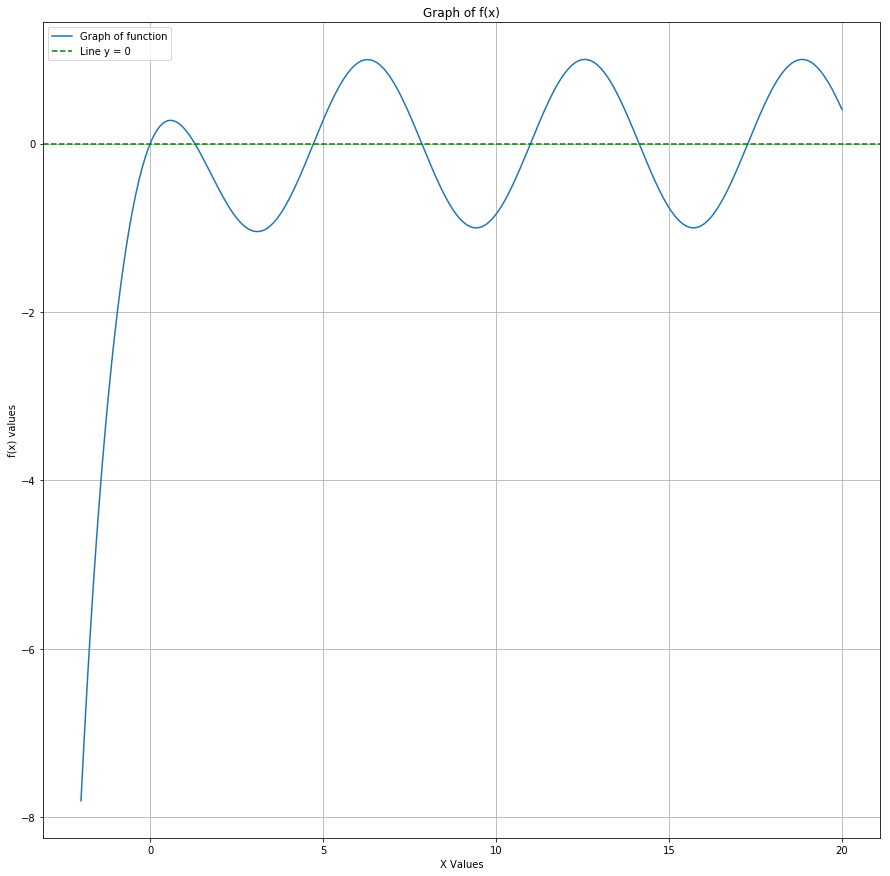

In [25]:
x1 = plot_graph(functionA,-2,20,500)

From the above it can be stated that a reasonable choice for the interval to search for a root using the bisection method would be $[1,1.5]$

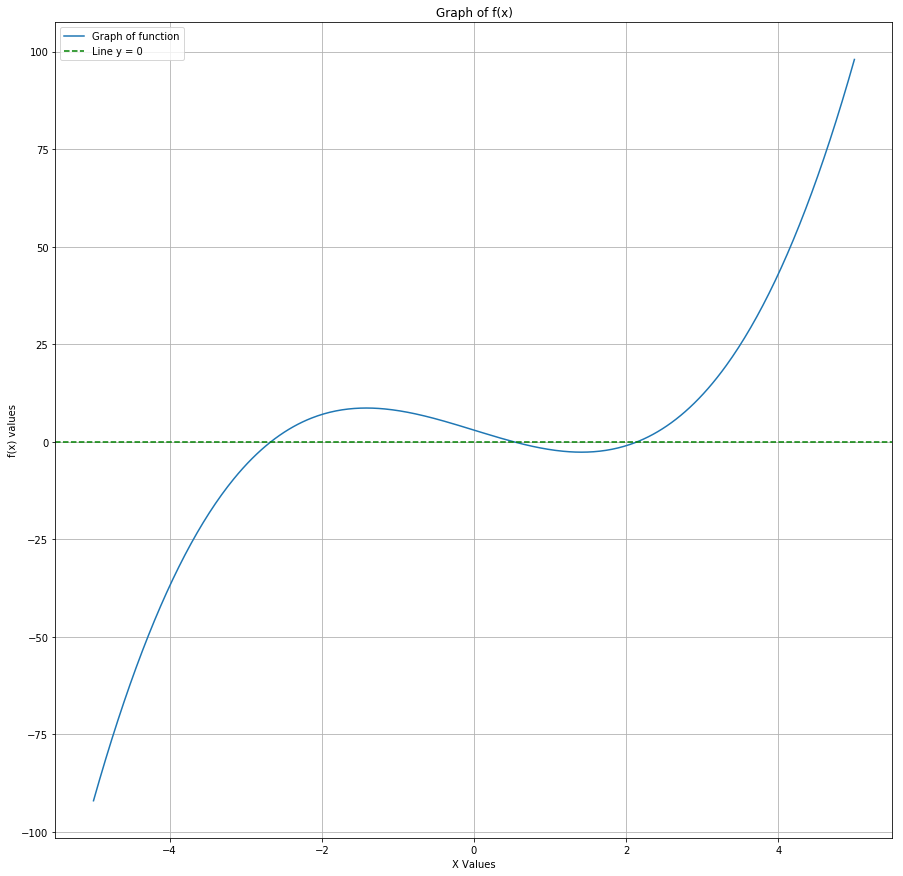

In [26]:
x2 = plot_graph(functionB,-5,5,500)

Likewise for the above graph a reasonable choice to search for the smallest positive root could be $[-1,1.75]$

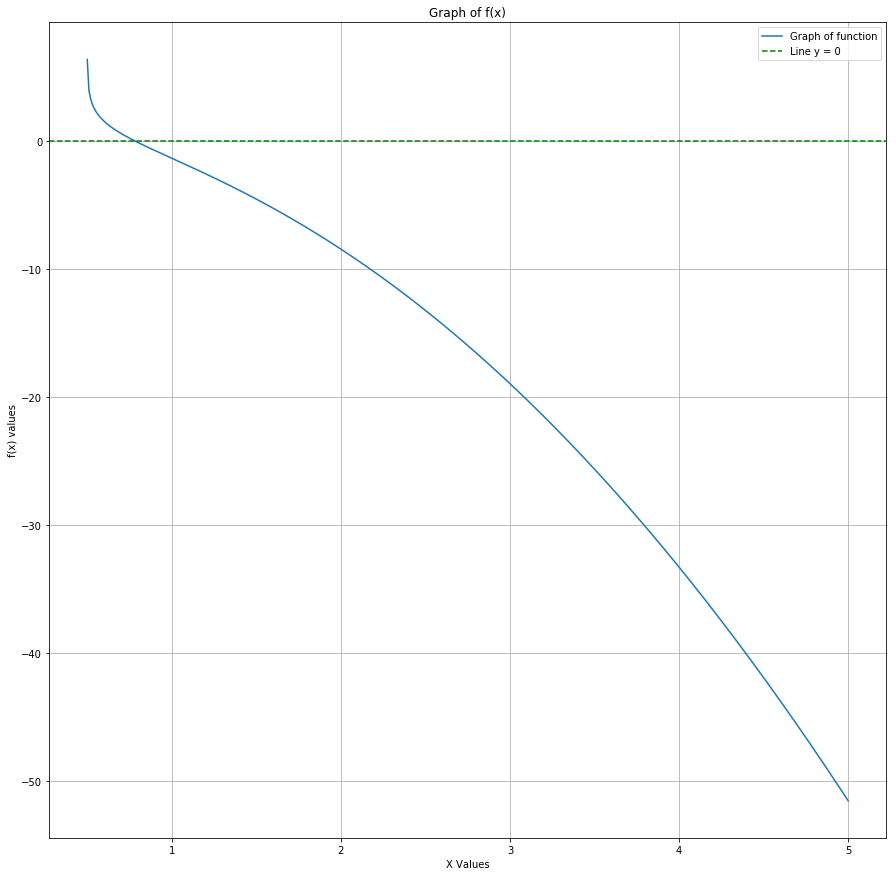

In [27]:
warnings.filterwarnings("ignore", message="invalid value encountered")

x3 = plot_graph(functionC,0,5,500)

Similarly, to avoid the asympotic behaviour at $x=0.5$ a reasonable interval can be $[0.6,1]$

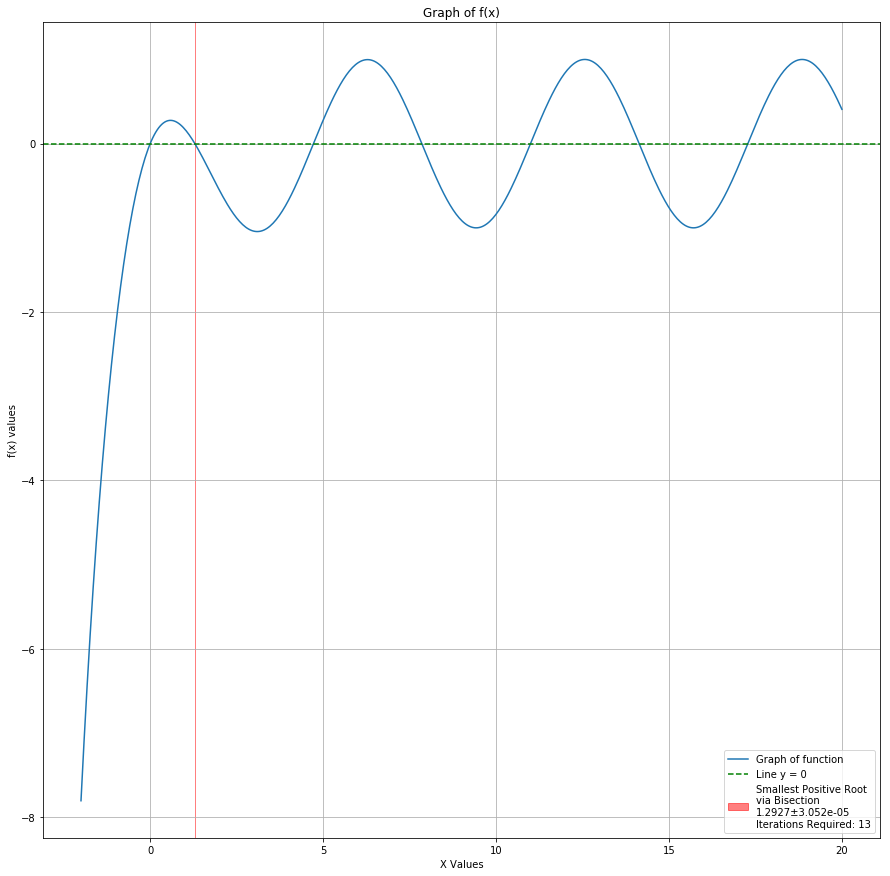

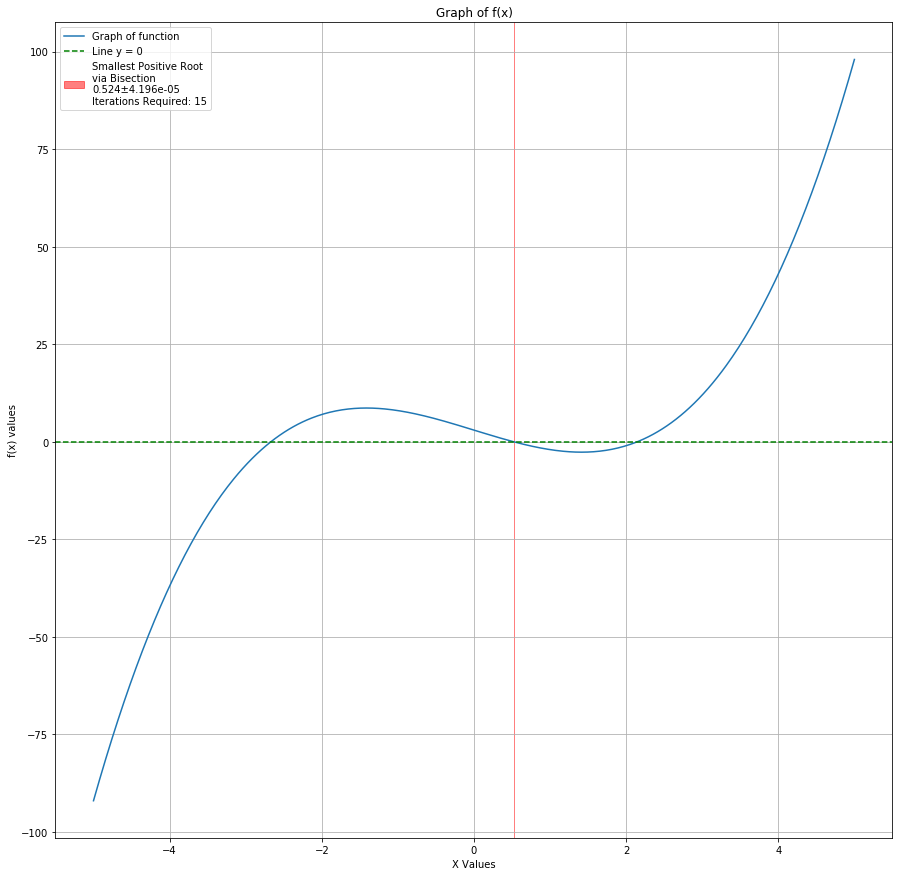

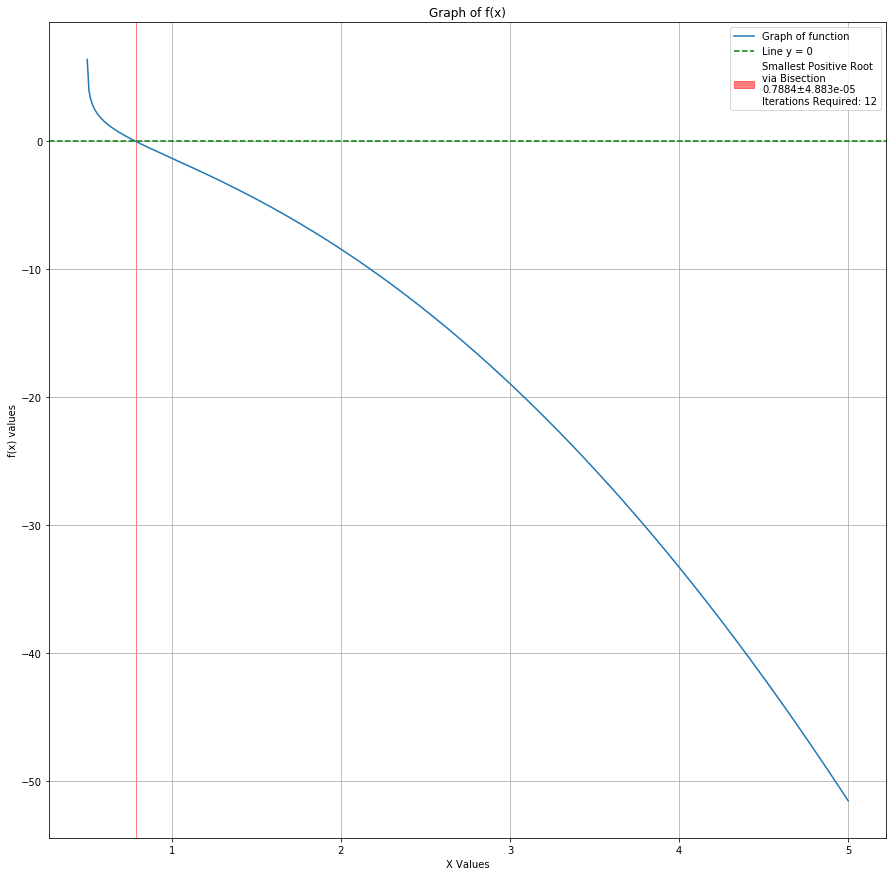

In [28]:
Bisect_soln(functionA,1,1.5,0.0001,500,x1)
Bisect_soln(functionB,-1,1.75,0.0001,500,x2)
Bisect_soln(functionC,0.6,1,0.0001,500,x3)

From the above outputs it is fairly clear that the number of iterations for each function is above ten. This indicates that the method converges rather slowly towards to stable value. 

## 1.2 The Secant Method

Similar to the bisection method, the secant method for root finding relies on selecting an appropriate interval $[a,b]$ from which a line from points $f(a)$ and $f(b)$ is constructed. This line $g(x)$ has equation:

$$ g(x) = \frac{f(b)-f(a)}{b-a}(x-a) + b $$

and is then extrapolated to the x-axis. The intersection of $g(x)$ with the x-axis takes the value $p$ implying:

$$ p = \frac{af(b) - bf(a)}{f(b) - f(a)} $$

The new interval then becomes $[b,p]$ or $[p,a]$ depending on the value of $p$ with respect to $a$ and $b$. This process is repeated until the root lies between a desired accuracy window. Due to the uncertainty in the algorithm, whether the interval becomes $[b,p]$ or $[p,a]$, a zero point may be found but may not be necessarily the point one is looking for. 

Below is an outline for a Secant function, one that returns the root of a function via the secant method described. This was tested with each of the test functions outlined in section 1.1

In [10]:
#Defines the Secant root finding function
def secant(func, x_nil, x_one, ep, max_iterate, verbose=False, *arg): 
    """Root Finding Function using the Secant method. 
    
    Args:
        func:        Function, the root of which is to be evaluated
        x_nil:       Lower bound of initial guess
        x_one:       Upper bound of initial guess 
        ep:          Error tolerance for the found root 
        max_iterate: Maximum number of iterations allowed to find the root 
        
    Optional Args: 
        verbose:     Boolean, if True will print the iterations 
        *arg:        Any additional arguments for the tested function 

    Returns:
        root:        Root of the function found by bisect
        error_bound: Error bound for the found root
        it_count:    Number of iterations taken to find root 
    """
    
    x0 = x_nil
    x1 = x_one 
    error = 1
    fx0 = func(x0, *arg) 
    it_count = 0 
    
    # Loop until we are confident we have achieved at least the accuracy specified by ep.
    # The ep/2 is genuinely needed to ensure our result (rounded to nearest 'ep') matches
    # the true solution (when also rounded to nearest 'ep').
    while abs(error) > ep/2 and it_count <= max_iterate:
        it_count += 1 
        fx1 = func(x1, *arg) 
        
        # Error Handling: Checks if the denominator would be evaluated to zero, in which case the algorithm fails
        if fx1-fx0 == 0:
            raise Exception("f(x1) = f(x0); Division by Zero; Stop") 
        
        x2 = x1 - fx1*(x1-x0)/(fx1-fx0) 
        error = x2-x1 
        
        if verbose == True: 
            print("#{0}, x1:{1}, f(x1):{2}, error:{3}".format(it_count, x1, fx1, error)) 
    
        x0 = x1
        x1 = x2 
        fx0 = fx1 
        
    if it_count > max_iterate:
        print("WARNING: The number of iterations exceeded max_iterate. An accurate root was not calculated")
        root = x2   # We may as well return our best guess, even though we know we have not converged
    else: 
        root = x2
        
    return(root, error, it_count)

In [29]:
#Defines a function to automatically plot the function and resulting root approximation, the red region being the approximation
def Secant_soln(function,a0,b0,ep,max_iter,x):
    root, error, iterations = secant(function, a0, b0, ep, max_iter)
    
    plt.figure(figsize=(15,15))
    plt.plot(x,function(x), label="Graph of function")
    plt.axhline(0, linestyle="--", color="green", label="Line y = 0")
    plt.axvspan(root-error,root+error,alpha=0.5,color="red", label="Smallest Positive Root\nvia Bisection\n" + str(np.around(root,decimals=4)) + u"\u00B1" + str(np.around(error,decimals=8)) + "\nIterations Required: " + str(iterations))
    plt.xlabel("X Values")
    plt.ylabel("f(x) values")
    plt.title("Graph of f(x)")
    plt.grid()
    plt.legend()
    plt.show()

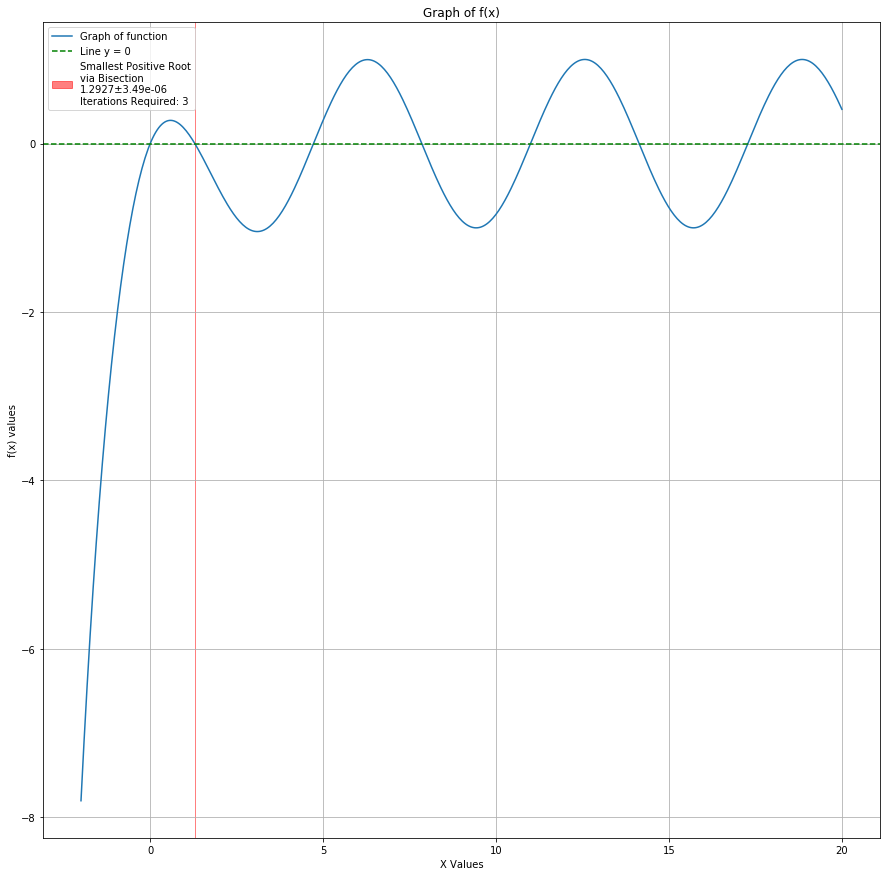

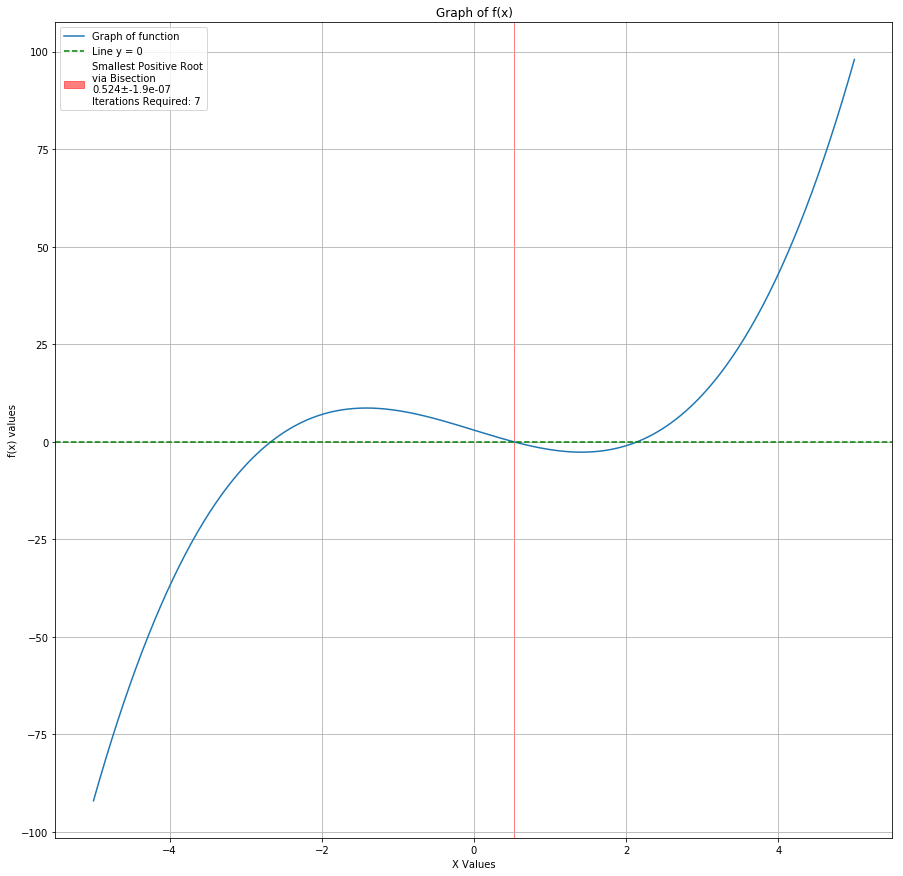

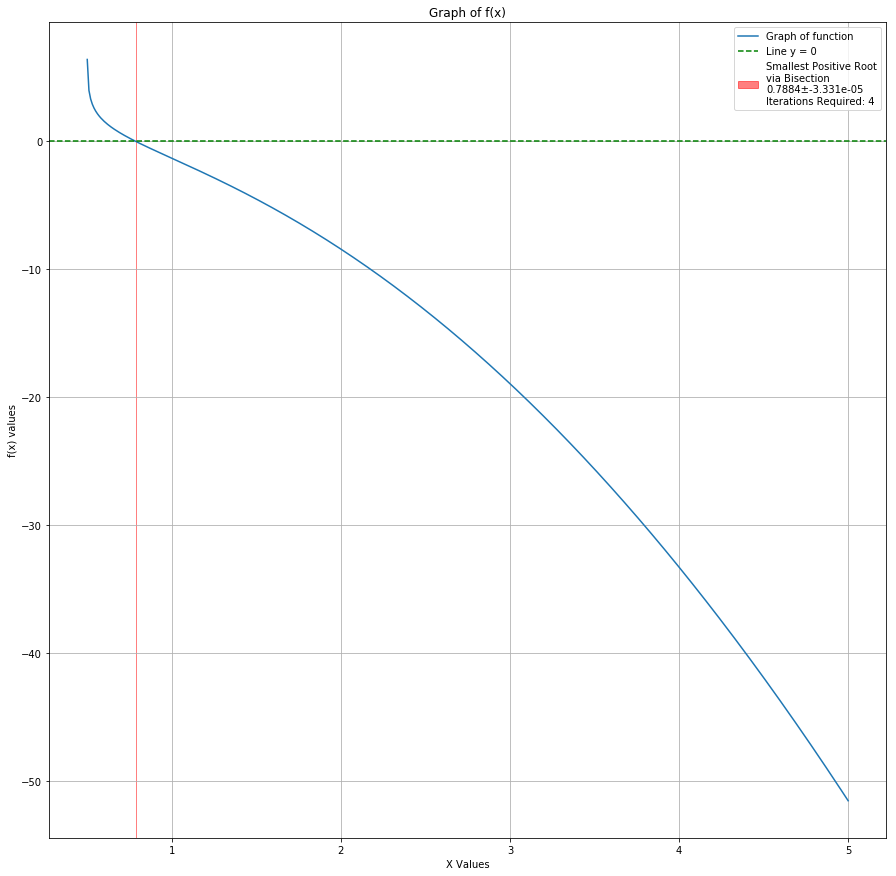

In [30]:
Secant_soln(functionA,1,1.3,0.0001,500,x1)
Secant_soln(functionB,-1,1.5,0.0001,500,x2)
Secant_soln(functionC,0.6,1,0.0001,500,x3)

In comparison to the Bisection method, the Secant method converges much quicker if the gradient at the root is relatively large. For test function (b) it is evident that the solution converges quicker than the bisection method but not by much this is llikely due to the line overshooting on either side of the root. 

## 1.3 The Newton-Raphson Method

Much like the Secant method of root finding, the Newton-Raphson method involves taking the derivative at a point $x = a$. This generates a tangent line to the point $x = a$ which when extrapolated to the x-axis yields a value $p$. Mathematically, this may be seen as:

$$ m = \frac{df}{dx}_{x=a} ; p = a -\frac{f(a)}{m}$$

This method however does require the function to have an expressible derivative but may also be used to calculate complex roots.

Below is an outline for a Newton-Raphson function, `newton`, one that returns the root of a function via the method described. This was tested with each of the test functions outlined in section 1.1

In [13]:
# Defines the Newton-Raphson Function
def newton(func, deriv_func, x_nil, ep, max_iterate, verbose=False, *arg):
    """ Root finding function using Newton-Raphson method 
    
    Args:
        func: Function, the root of which is to be calculated
        deriv_func: Function, which calculates the value of the derivative of the function 
        x_nil: Initial guess of root value 
        ep: Error tolerance for found root
        max_iterate: Maximum number of iterations allowed to find the root
        
    Optional Args:
        decimals: Number of decimals to round the root to
        verbose: Boolean, if True will print the iterations 
        *arg: Any additional arguments for func and deriv_func assuming same arguments needed
    """
    
    x0 = x_nil 
    error = 1 
    it_count = 0 
    
    # Loop until we are confident we have achieved at least the accuracy specified by ep.
    # The ep/2 is genuinely needed to ensure our result (rounded to nearest 'ep') matches
    # the true solution (when also rounded to nearest 'ep').
    while abs(error) > ep/2 and it_count <= max_iterate:
        fx = func(x0, *arg) 
        dfx = deriv_func(x0, *arg)  
        
        #Error handling: Checks if derivative is zero in which case the algorithm fails
        if dfx == 0.0:
            raise Exception("The derivative is zero. Stop!") 
            
        x1 = x0 - fx/dfx
        error = x1 - x0
        
        if verbose == True:
            print("#{0}, x:{1}, f(x):{2}, f'(x):{3}, error:{4}".format(it_count,x0,fx,dfx,error)) 
        
        x0 = x1 
        it_count += 1 
        
    if it_count > max_iterate: 
        print("WARNING: The number of iterations exceeded max_iterate. An accurate root was not calculated")
        root = x1   # We may as well return our best guess, even though we know we have not converged
    else: 
        root = x1
        
    return(root, error, it_count)

In [14]:

#Defines the derivatives of the functions (a)-(c)
def derivA(x):
    return -np.sin(x)+np.exp(-x)

def derivB(x):
    return 3*x**2 - 6

def derivC(x):
    return -4*x - 1/(x-0.5)

In [31]:
#Defines a function to automatically plot the function and resulting root approximation, the red region being the approximation
def Newton_soln(function,deriv,a0,ep,max_iter,x):
    root,error,iterations = newton(function,deriv,a0,ep,max_iter)
    
    plt.figure(figsize=(15,15))
    plt.plot(x,function(x), label="Graph of function")
    plt.axhline(0, linestyle="--", color="green", label="Line y = 0")
    plt.axvspan(root-error,root+error,alpha=0.5,color="red", label="Smallest Positive Root\nvia Newton Method\n" + str(np.around(root,decimals=4)) + u"\u00B1" + str(np.around(error,decimals=8)) + "\nIterations Required: " + str(iterations))
    plt.xlabel("X Values")
    plt.ylabel("f(x) values")
    plt.title("Graph of f(x)")
    plt.grid()
    plt.legend()
    plt.show()

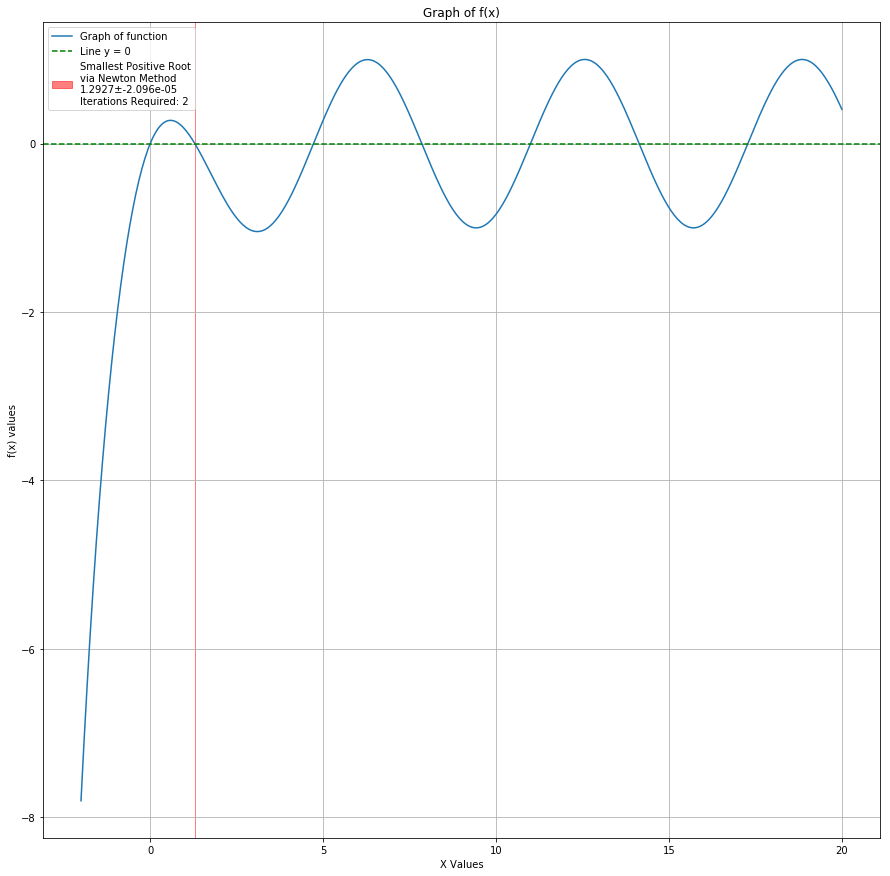

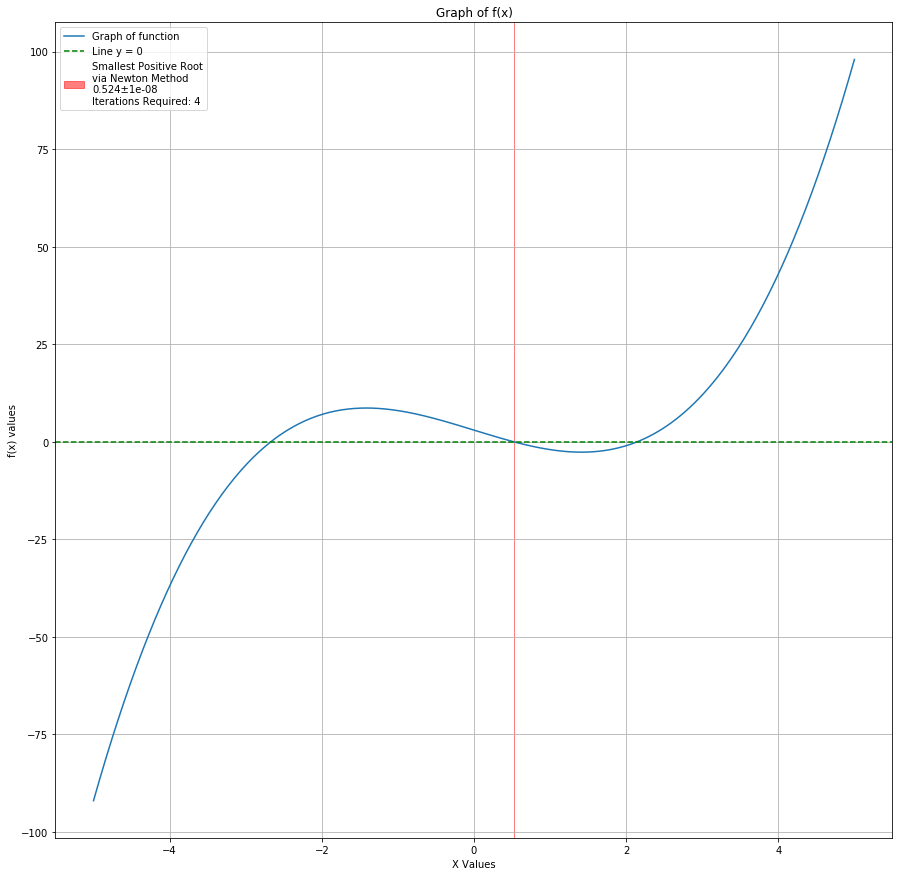

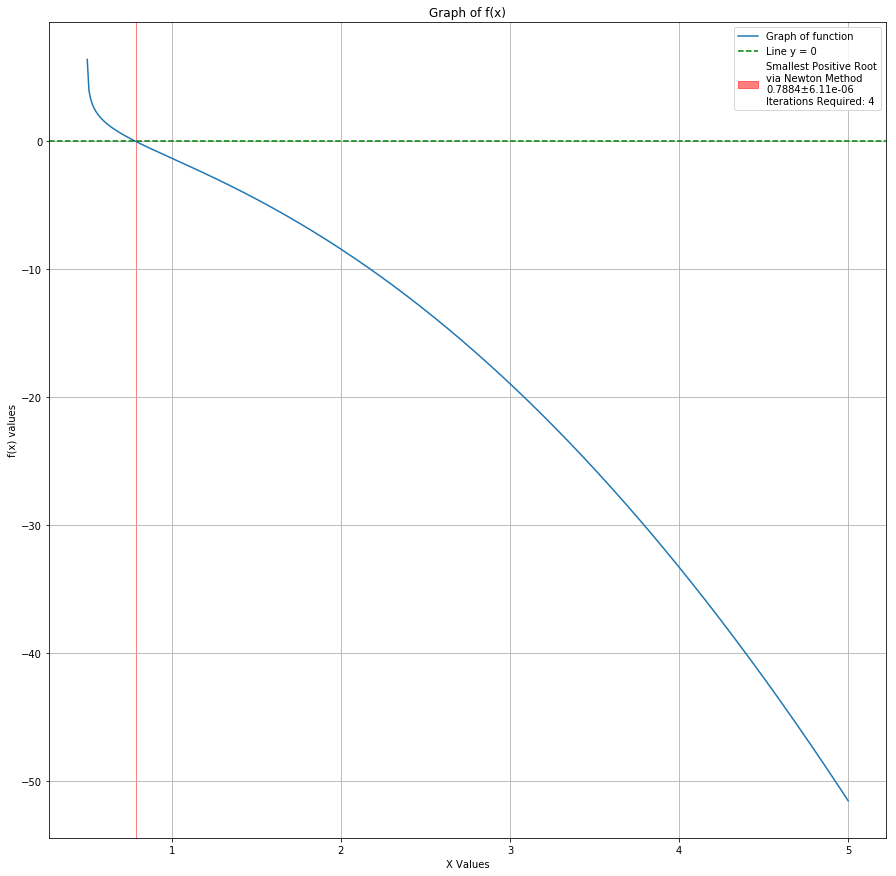

In [32]:
#Plots the Newton-Raphson approximation of each root
Newton_soln(functionA,derivA,1.3,0.0001,500,x1)
Newton_soln(functionB,derivB,0,0.0001,500,x2)
Newton_soln(functionC,derivC,0.6,0.0001,500,x3)

Examining the above outputs it can be seen that the Newton-Raphson method converges the quickest to a resonable solution compared to the Bisection and Secant methods. 

To investigate the claim that the Newton-Raphson method can solve for complex roots another test function was supplied to each of the algorithms previously described. This test function took the form:

$$x^{3} + 2x^{2} - x + 5$$

With a selection of starting values; $x = 1 + i, x = 1 - i, x = -4$ 

In [33]:
#Defines the function described above
def functionD(x):
    return x**3+2*x**2-x+5

#Defines the derivative of the function described above
def derivD(x):
    return 3*x**2+4*x-1

In [34]:
#Returns all three roots of the equation where root 1 and 2 will be complex conjugates
root,error,iterations = newton(functionD,derivD,np.complex(1,1),0.0001,500)
root2,error2,iterations2 = newton(functionD,derivD,np.complex(1,-1),0.0001,500)
root3,error3,iterations3 = newton(functionD,derivD,-4,0.0001,500)

print("Root 1:" + str(root) + u"\u00B1" + str(error))
print("Root 2:" + str(root2) + u"\u00B1" + str(error2))
print("Root 3:" + str(root3) + u"\u00B1" + str(error3))

Root 1:(0.4629257757385479+1.2225399480113515j)±(-3.133208043015756e-08+2.197109827406507e-09j)
Root 2:(0.4629257757385479-1.2225399480113515j)±(-3.133208043015756e-08-2.197109827406507e-09j)
Root 3:-2.925851551477284±6.009671258411231e-07


It is evident that the results are correct as root 1 and 2 calculated are conjugates and that the Newton-Raphson Method may be used to solve for the complex roots of a function. 

The Bisection and Secant methods fail to calculate the root as it is impossible to express a complex number on a soley real interval. 

The Newton-Raphson method can also fail, specifically if the gradient at the root approches infinity, in otherwords the tangent to the root is a vertical line. This flaw may be illustrated below using the function:

$$f(x) = \text{sign}(x-2)\sqrt{|x-2|}; f'(x) = \frac{f(x)}{2(x-2)} $$

It is anticipated that the method will fail to solve for the root as the closer $x$ tends to 2 from above and below the gradient approches plus or minus $\infty$. Below is a graph of the function described above and the output of `Newton_Soln`:

In [35]:
# Defines the Function described above
def functionE(x):
    return np.sign(x-2)*np.sqrt(np.abs(x-2))

# Defines the derivative of the Function described above
def derivE(x):
    return functionE(x)/(2*(x-2))

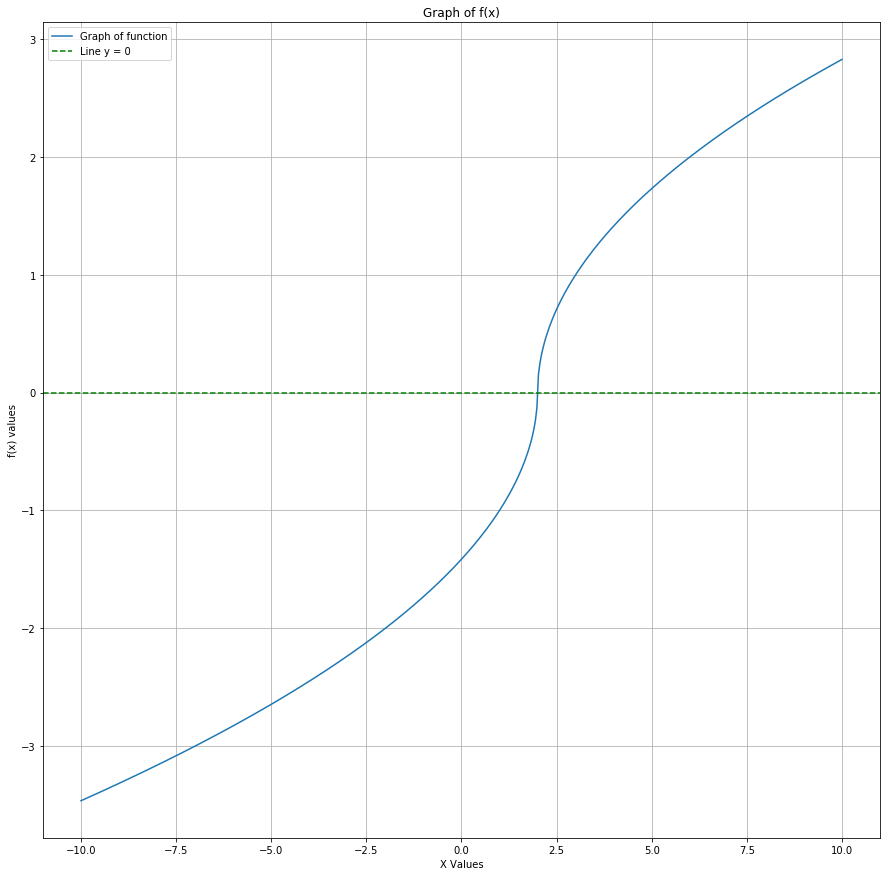

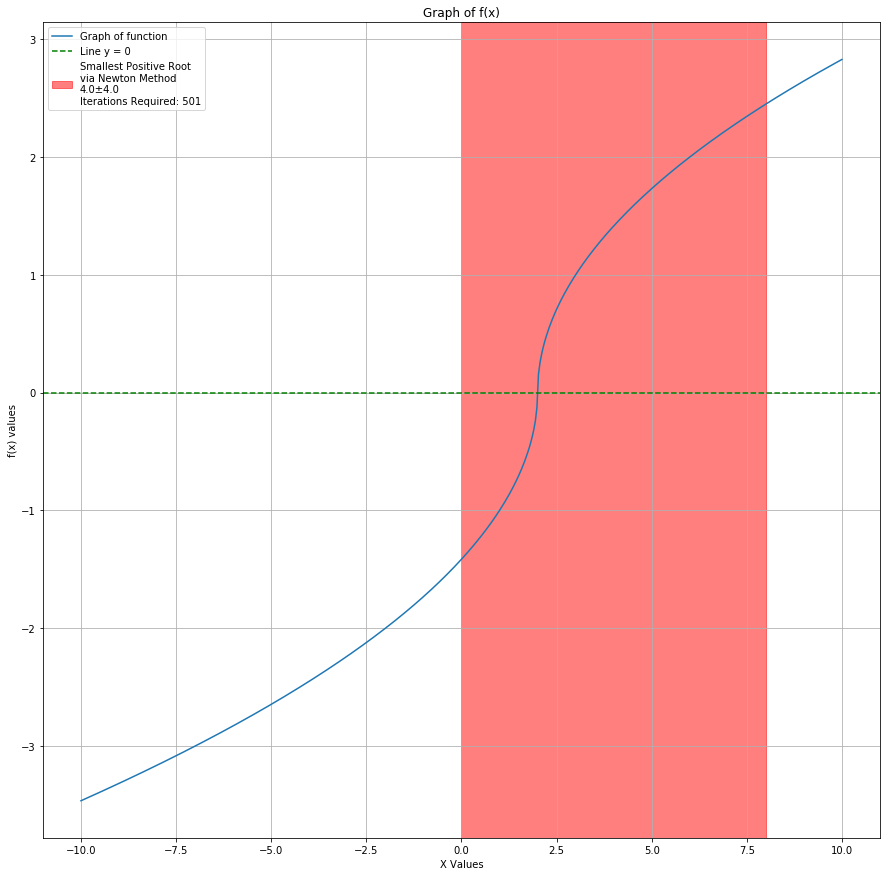

In [36]:
#Plots the graph of the Function described above
x5 = plot_graph(functionE,-10,10,500)

# Plots the Newton-Raphson approximation of the root
Newton_soln(functionE,derivE,0,0.0001,500,x5)

It can be seen that the method fails to reach a conclusion returning an error as the number of iterations has exceeded the given value. A best guess of the root has been supplied in the form of the red area on the graph. Instead, the Secant and Bisection Methods may be applied to yield a true result.

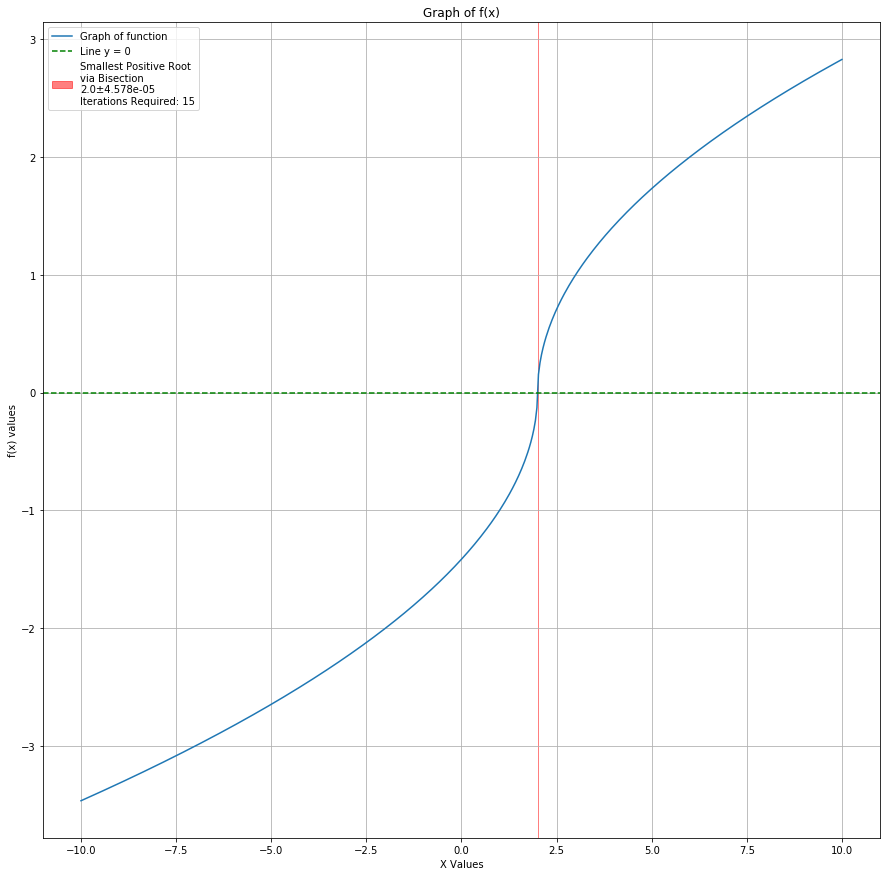

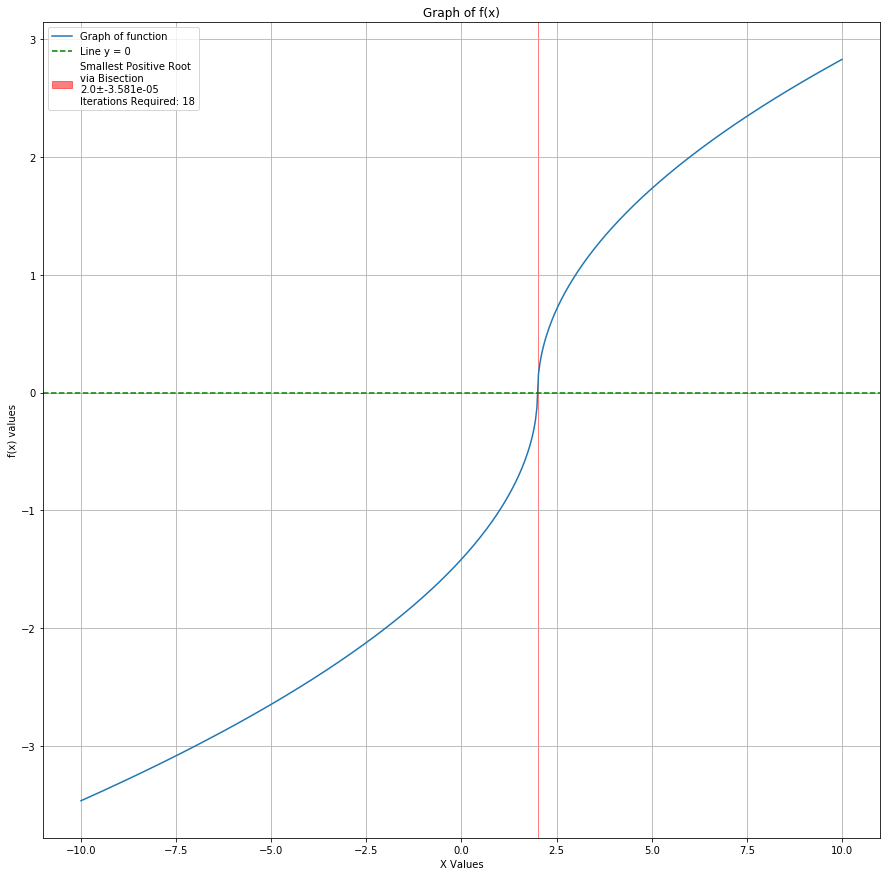

In [37]:
# Plots the Bisection and Secant approximations of the root
Bisect_soln(functionE,0,3,0.0001,500,x5)
Secant_soln(functionE,0,3,0.0001,500,x5)

## 2.1 Convergence Rates

To analyse the convergence rate of a method on a particular solution a list of accuracies and corresponding iteration count must be obtained.

C:\Users\camer\Anaconda3\lib\site-packages\matplotlib\pyplot.py:1442: UserWarning: Attempted to set non-positive right xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)


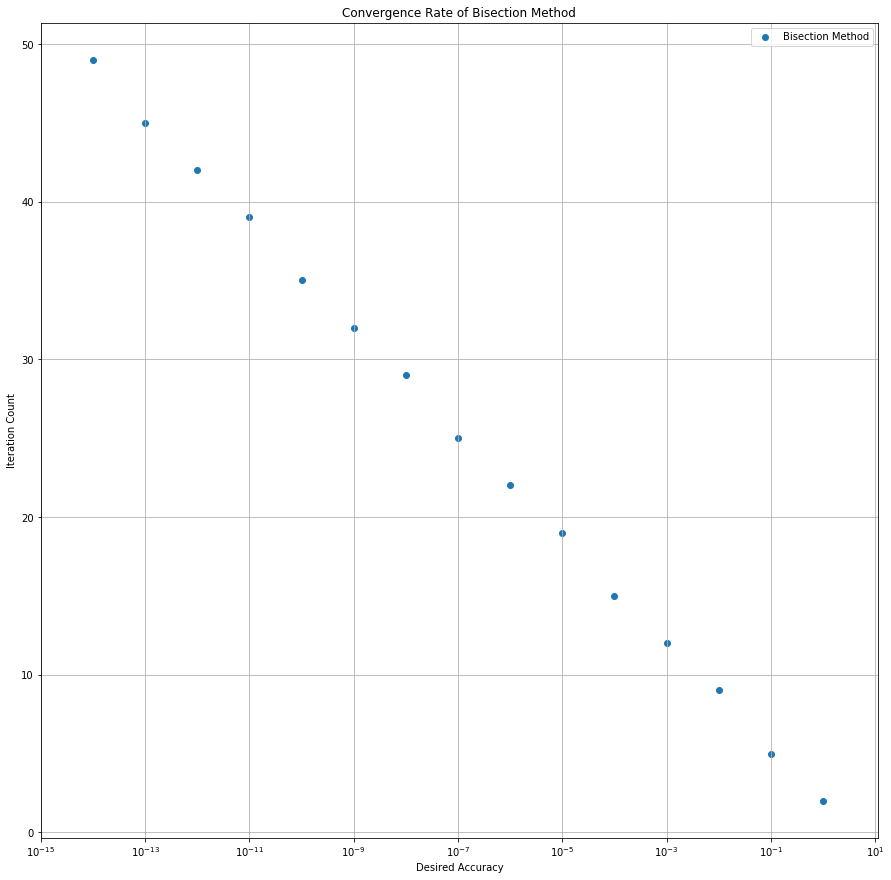

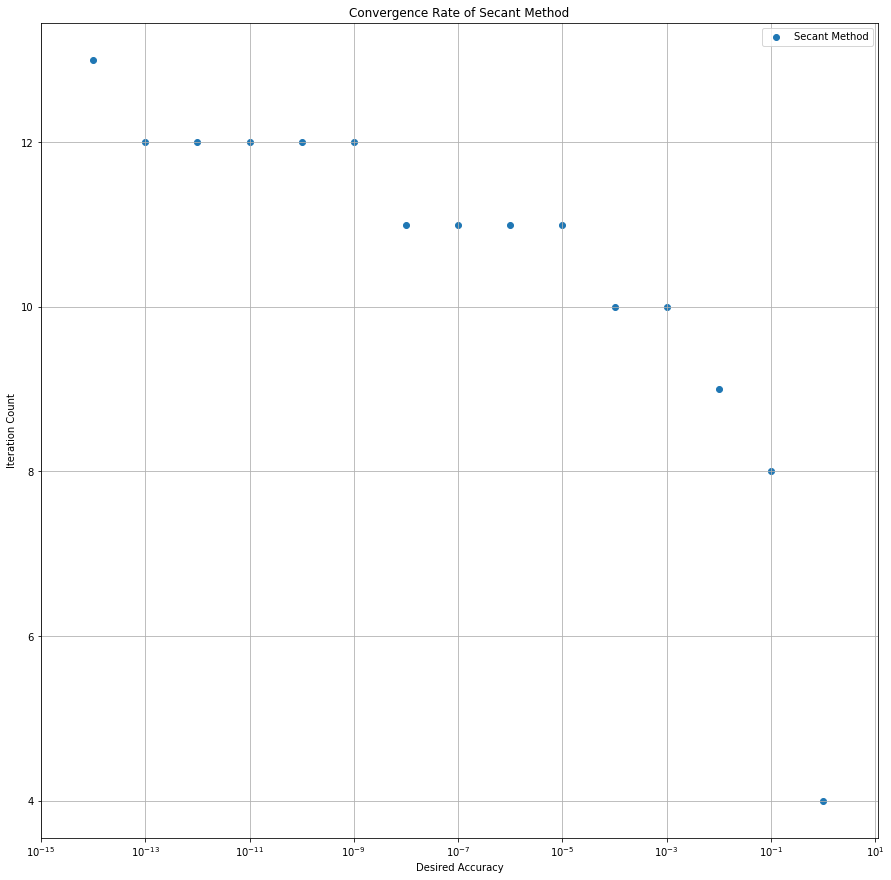

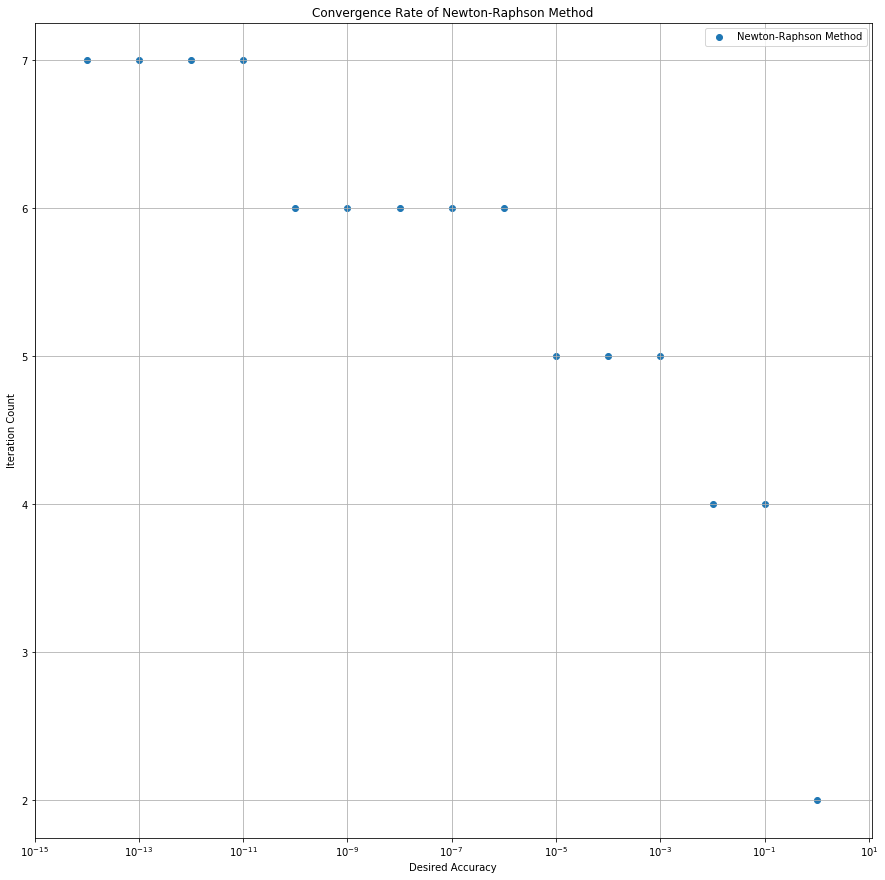

In [38]:
# Init of variables
iterations_bisect = []
iterations_secant = []
iterations_newton = []
accuracy_list = []

# Defines a range of Accuracies, decreasing in orders of magnitude
for i in range(0,15):
    accuracy_list.append(1/10**i)
    
# Yields the number of iterations required to obtain the desired incrementing accuracy
i = 0
while i < len(accuracy_list):
    iterations_bisect.append(bisect(functionB,-4,-1,accuracy_list[i],500)[-1])
    iterations_secant.append(secant(functionB,-4,-1,accuracy_list[i],500)[-1])
    iterations_newton.append(newton(functionB,derivB,-4,accuracy_list[i],500)[-1])
    i += 1

#Plots graph of convergence rate for Bisection Method
plt.figure(figsize=(15,15))
plt.scatter(accuracy_list,iterations_bisect,label="Bisection Method")
plt.ylabel("Iteration Count")
plt.xlabel("Desired Accuracy")
plt.title("Convergence Rate of Bisection Method")
plt.xscale("log")
plt.xlim(10**-15,0)
plt.grid()
plt.legend()
plt.show()


#Plots graph of convergence rate for Secant Method
plt.figure(figsize=(15,15))
plt.scatter(accuracy_list,iterations_secant,label="Secant Method")
plt.ylabel("Iteration Count")
plt.xlabel("Desired Accuracy")
plt.title("Convergence Rate of Secant Method")
plt.legend()
plt.xscale("log")
plt.xlim(10**-15,0)
plt.grid()
plt.show()


#Plots graph of convergence rate for Newton-Raphson Method
plt.figure(figsize=(15,15))                                                                       
plt.scatter(accuracy_list,iterations_newton,label="Newton-Raphson Method")
plt.ylabel("Iteration Count")
plt.xlabel("Desired Accuracy")
plt.title("Convergence Rate of Newton-Raphson Method")
plt.xscale("log")
plt.legend()
plt.xlim(10**-15,0)
plt.grid()
plt.show()

From the graphs above it is clear to see that each method has a set convergence rate. The slowest of these rates is the linear convergence rate illustrated by the Bisection Method. This implies to get accurate results at higher and higher orders of precision the iteration count increases considerably. 

The quickest converging method is the Newton-Raphson method, the graph displays a quadratic convergence rate. This implies that for high order accuracy measurements the iteration count stays close to a select value for an extended period. This is made clear by examining the grouping of points. At higher accuracies the points group together on the same iteration values.

The middle ground for the convergence rates is the Secant method. This method converges superlinearly as seen above.